<a href="https://colab.research.google.com/github/Watirboi/data_science/blob/main/SA_Traffic_Stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with dates and times in pandas

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

## Load Datasets

In [ ]:
filename = 'tx_san_antonio_2020_04_01.csv'
names = ['date','time','location','substation','subject_age','subject_sex','violation','subject_race']
sa_traffic = pd.read_csv(filename, header=0, usecols=names)
sa_traffic = sa_traffic.reindex(columns=names)

## Taking Care of missing data

In [ ]:
# missing data counts
print(print(sa_traffic.isnull().sum()))

date                0
time                1
location            3
substation      79420
subject_age      1331
subject_sex      2796
violation           7
subject_race      266
dtype: int64
None


In [ ]:
print(sa_traffic.dtypes)

date             object
time             object
location         object
substation       object
subject_age     float64
subject_sex      object
violation        object
subject_race     object
dtype: object


In [ ]:
from sklearn.impute import SimpleImputer
# handle string date column
s_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Data') # string or object values
s_imputer.fit(sa_traffic.iloc[:, 0:1])
sa_traffic.iloc[:, 0:1] = s_imputer.transform(sa_traffic.iloc[:, 0:1])

# handle string time column
s_time_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='00:00:00')
s_time_imputer.fit(sa_traffic.iloc[:, 1:2]) 
sa_traffic.iloc[:, 1:2] = s_time_imputer.transform(sa_traffic.iloc[:, 1:2])

# handle string ['location','substation'] columns
s_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Data')
s_imputer.fit(sa_traffic.iloc[:, 2:4]) 
sa_traffic.iloc[:, 2:4] = s_imputer.transform(sa_traffic.iloc[:, 2:4])

s_subject_age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # only numerical values
s_subject_age_imputer.fit(sa_traffic.iloc[:, 4:5]) 
sa_traffic.iloc[:, 4:5] = s_subject_age_imputer.transform(sa_traffic.iloc[:, 4:5])

s_imputer.fit(sa_traffic.iloc[:, 5:8])
sa_traffic.iloc[:, 5:8] = s_imputer.transform(sa_traffic.iloc[:, 5:8])

In [ ]:
pd.to_datetime(sa_traffic['date'] + ' ' + sa_traffic['time'])

0         2015-04-03 20:35:00
1         2014-08-10 09:55:00
2         2014-11-01 15:00:00
3         2014-02-14 20:24:00
4         2014-11-03 16:30:00
                  ...        
1040423   2018-04-10 06:05:00
1040424   2018-04-10 06:12:00
1040425   2012-04-19 08:20:00
1040426   2012-04-24 13:51:00
1040427   2012-12-13 10:53:00
Length: 1040428, dtype: datetime64[ns]

In [ ]:
# Verify no nulls remain
print(print(sa_traffic.isnull().sum()))

date            0
time            0
location        0
substation      0
subject_age     0
subject_sex     0
violation       0
subject_race    0
dtype: int64
None


## Dataset Evaluation

In [ ]:
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,20:35:00,31 RUE CHARLES,NORTH,24.000000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,09:55:00,FRONTAGE RD 16,SOUTH,35.782104,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,15:00:00,1900 DAKOTA,EAST,48.000000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,20:24:00,5439 ENCANTA,NORTH,40.000000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,16:30:00,5530 HAVENCREST,SOUTH,44.000000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [ ]:
sa_traffic.dtypes

date             object
time             object
location         object
substation       object
subject_age     float64
subject_sex      object
violation        object
subject_race     object
dtype: object

In [ ]:
# 8 characters from the end to 6 characters from the end
# this is quite a chore
sa_traffic.time.str.slice(-8, -6).astype(int).head()

0    20
1     9
2    15
3    20
4    16
Name: time, dtype: int64

In [ ]:
# we will convert the Time column to datatime format
# there are many options to ensure this works well with your data
sa_traffic['time'] = pd.to_datetime(sa_traffic.time)
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2020-10-17 20:35:00,31 RUE CHARLES,NORTH,24.000000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2020-10-17 09:55:00,FRONTAGE RD 16,SOUTH,35.782104,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2020-10-17 15:00:00,1900 DAKOTA,EAST,48.000000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2020-10-17 20:24:00,5439 ENCANTA,NORTH,40.000000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2020-10-17 16:30:00,5530 HAVENCREST,SOUTH,44.000000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [ ]:
sa_traffic.dtypes

date                    object
time            datetime64[ns]
location                object
substation              object
subject_age            float64
subject_sex             object
violation               object
subject_race            object
dtype: object

In [ ]:
sa_traffic.time.dt.hour.head()

0    20
1     9
2    15
3    20
4    16
Name: time, dtype: int64

In [ ]:
sa_traffic.time.dt.weekday.head()

0    5
1    5
2    5
3    5
4    5
Name: time, dtype: int64

In [ ]:
sa_traffic.time.dt.dayofyear.head()

0    291
1    291
2    291
3    291
4    291
Name: time, dtype: int64

## Timestamps

In [ ]:
ts = pd.to_datetime('1/1/2012')

In [ ]:
sa_traffic.loc[sa_traffic.time >= ts, :].head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2020-10-17 20:35:00,31 RUE CHARLES,NORTH,24.000000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2020-10-17 09:55:00,FRONTAGE RD 16,SOUTH,35.782104,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2020-10-17 15:00:00,1900 DAKOTA,EAST,48.000000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2020-10-17 20:24:00,5439 ENCANTA,NORTH,40.000000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2020-10-17 16:30:00,5530 HAVENCREST,SOUTH,44.000000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [ ]:
sa_traffic.time.max()

Timestamp('2020-10-17 23:59:00')

In [ ]:
sa_traffic.time.max() - sa_traffic.time.min()

Timedelta('0 days 23:59:00')

In [ ]:
(sa_traffic.time.max() - sa_traffic.time.min())

Timedelta('0 days 23:59:00')

## Plotting

In [ ]:
%matplotlib inline

In [ ]:
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2020-10-17 20:35:00,31 RUE CHARLES,NORTH,24.000000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2020-10-17 09:55:00,FRONTAGE RD 16,SOUTH,35.782104,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2020-10-17 15:00:00,1900 DAKOTA,EAST,48.000000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2020-10-17 20:24:00,5439 ENCANTA,NORTH,40.000000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2020-10-17 16:30:00,5530 HAVENCREST,SOUTH,44.000000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


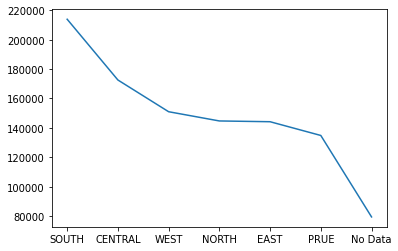

In [ ]:
sa_traffic.substation.value_counts().plot()

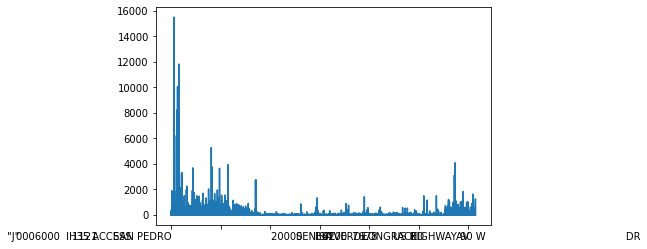

In [ ]:
sa_traffic.location.value_counts().sort_index().plot()

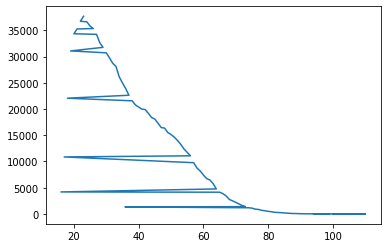

In [ ]:
sa_traffic.subject_age.value_counts().plot()

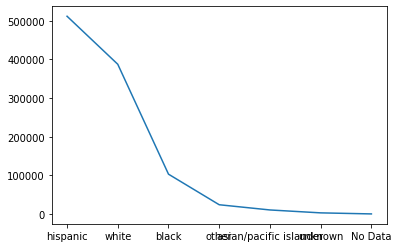

In [ ]:
sa_traffic.subject_race.value_counts().plot()

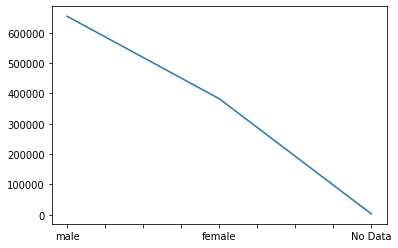

In [ ]:
sa_traffic.subject_sex.value_counts().plot()

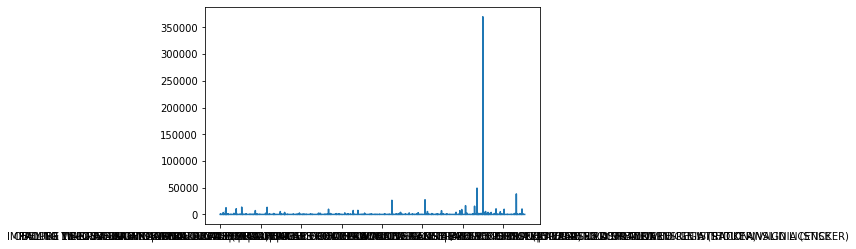

In [ ]:
sa_traffic.violation.value_counts().sort_index().plot()